Stops:
This Indicator measures the rate of discretionary stops per 1,000 people in Oakland by race/ethnicity. “In 2016 through 2017, officers were required to complete stop data forms after every discretionary detention or arrest, and discretionary encounters in which a search or request to search occurred. Discretionary stops and searches exclude detentions and arrests that occurred as the result of a dispatched call for service, a citizen request, or for stops occurring pursuant to search warrants.” (Source: Oakland Police Department’s 2016- 2017 Stop Data Report)

In [1]:
import pandas as pd
import geopandas as gp
import fiona
import descartes
import matplotlib.pyplot as plt
from shapely.geometry import Point, Polygon
import contextily as ctx
import matplotlib.pylab as pylab
from scipy import ndimage
import numpy as np
import seaborn as sns
import scipy
import six

In [2]:
df = pd.read_csv('stops.csv')
df = df.dropna()

In [3]:
del df['Year']

In [4]:
df = df[df['Race/Ethnicity'] != 'Citywide']

In [5]:
race2 = df.pivot_table(values=['Rate per 1,000 people in Oakland','Population of Oakland'],index='Race/Ethnicity',)

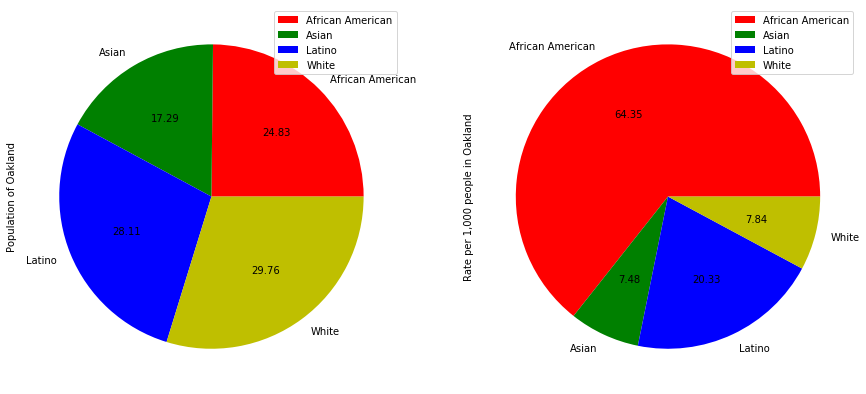

In [6]:
race2.plot.pie(subplots=True,figsize=(15,20),autopct='%.2f',colors='rgby')
plt.savefig('racepie.png')

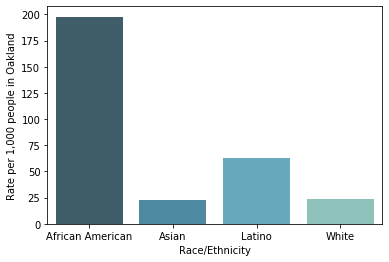

In [7]:
sns.barplot(x='Race/Ethnicity',y='Rate per 1,000 people in Oakland',data=df,palette="GnBu_d")
plt.savefig('bar.png')

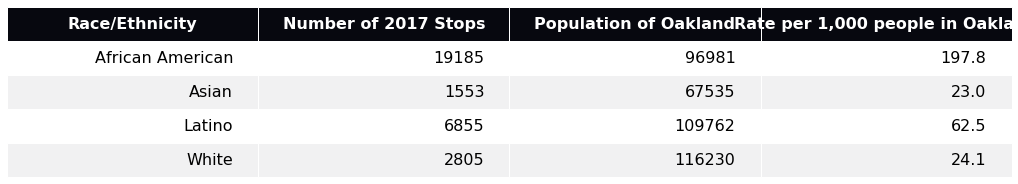

In [8]:
def render_mpl_table(data, col_width=3.0, row_height=0.625, font_size=16,
                     header_color='#07080f', row_colors=['#f1f1f2', 'w'], edge_color='w',
                     bbox=[0, 0, 1, 1], header_columns=0,
                     ax=None, **kwargs):
    if ax is None:
        size = (np.array(data.shape[::-1]) + np.array([0, 1])) * np.array([col_width, row_height])
        fig, ax = plt.subplots(figsize=size)
        ax.axis('off')

    mpl_table = ax.table(cellText=data.values, bbox=bbox, colLabels=data.columns, **kwargs)

    mpl_table.auto_set_font_size(False)
    mpl_table.set_fontsize(font_size)

    for k, cell in  six.iteritems(mpl_table._cells):
        cell.set_edgecolor(edge_color)
        if k[0] == 0 or k[1] < header_columns:
            cell.set_text_props(weight='bold', color='w')
            cell.set_facecolor(header_color)
        else:
            cell.set_facecolor(row_colors[k[0]%len(row_colors) ])
    return ax

render_mpl_table(df, header_columns=0, col_width=4.5)
plt.savefig('chart.png')